<a href="https://colab.research.google.com/github/imsharvanj/Relation_between_FLFP_GDP/blob/main/shreya_flfpr_gdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import scipy.stats as stats

In [21]:
df = pd.read_csv('gdrive/My Drive/_python notebooks/data.csv')
df.rename(columns={'GDP per capita': 'gdp_per_capita', 'Year': 'year'}, inplace=True)
df.name = 'Cummulative Data'
df.head()

,year,gdp_per_capita,flfpr
0,1990,367.556609,30.443001
1,1991,303.055608,30.452999
2,1992,316.953927,30.493000
3,1993,301.159002,30.570000
4,1994,346.102951,30.691999


In [22]:
df['log_gdp_per_capita'] = np.log2(df['gdp_per_capita'])
df['log_gdp_per_capita_squared'] = df['log_gdp_per_capita']**2
df['abs_flfp'] = df['flfpr']/100
df.head()

,year,gdp_per_capita,flfpr,log_gdp_per_capita,log_gdp_per_capita_squared,abs_flfp
0,1990,367.556609,30.443001,8.521823,72.621461,0.30443
1,1991,303.055608,30.452999,8.243439,67.954282,0.30453
2,1992,316.953927,30.493000,8.308129,69.025013,0.30493
3,1993,301.159002,30.570000,8.234382,67.805040,0.30570
4,1994,346.102951,30.691999,8.435057,71.150194,0.30692


### **Recession happened between in 2006-2009. So we are dividing data in 2 parts.**


In [23]:
# before 2006
df_before_2006 = df[df['year'] < 2006]
df_before_2006.name = 'Before 2006'
df_before_2006.head()

,year,gdp_per_capita,flfpr,log_gdp_per_capita,log_gdp_per_capita_squared,abs_flfp
0,1990,367.556609,30.443001,8.521823,72.621461,0.30443
1,1991,303.055608,30.452999,8.243439,67.954282,0.30453
2,1992,316.953927,30.493000,8.308129,69.025013,0.30493
3,1993,301.159002,30.570000,8.234382,67.805040,0.30570
4,1994,346.102951,30.691999,8.435057,71.150194,0.30692


In [24]:
# after 2006
df_after_2006 = df[df['year'] >= 2006]
df_after_2006.name = 'After 2006'
df_after_2006.head()

,year,gdp_per_capita,flfpr,log_gdp_per_capita,log_gdp_per_capita_squared,abs_flfp
16,2006,806.753281,30.712000,9.655984,93.238022,0.30712
17,2007,1028.334772,29.490000,10.006094,100.121923,0.29490
18,2008,998.522342,28.290001,9.963651,99.274339,0.28290
19,2009,1101.960838,27.114000,10.105857,102.128351,0.27114
20,2010,1357.563727,25.965000,10.406804,108.301574,0.25965


In [25]:
def draw_scatter_plot(df): 
  sns.scatterplot(x='log_gdp_per_capita',y='abs_flfp',data=df) 
  plt.title('Female Labour Force Participation vs log(GDP per capita)\n' + df.name)
  plt.ylabel('FLFP')
  plt.xlabel('log(GDP per capita)')
  plt.show()

In [26]:
def draw_reg_plot(df):
  sns.regplot(x='log_gdp_per_capita',y='abs_flfp',data=df, order=2) 
  plt.title('Female Labour Force Participation vs log(GDP per capita)\n' + df.name)
  plt.ylabel('FLFP')
  plt.xlabel('log(GDP per capita)')
  plt.show()

In [27]:
def draw_extended_reg_plot(df):
  # degree 2 polynomial fit or quadratic fit
  model = np.poly1d(np.polyfit(df['log_gdp_per_capita'],
                              df['abs_flfp'], 2))
    
  # polynomial line visualization
  polyline = np.linspace(0, 20, 100)
  plt.scatter(df['log_gdp_per_capita'], df['abs_flfp'])
  plt.plot(polyline, model(polyline))
  plt.title('Female Labour Force Participation vs log(GDP per capita)\n' + df.name)
  plt.ylabel('FLFP')
  plt.xlabel('log(GDP per capita)')
  plt.show()
  return model
  

In [28]:
def get_r2_score(df, model):
  return r2_score(df['abs_flfp'], 
               model(df['log_gdp_per_capita']))

In [29]:
def get_coorelation(df):
  return abs(df['log_gdp_per_capita'].corr(df['abs_flfp']))

In [50]:
def draw_extended_reg_plot_cummulative(df1, df2):
  # degree 2 polynomial fit or quadratic fit
  model1 = np.poly1d(np.polyfit(df1['log_gdp_per_capita'],
                              df1['abs_flfp'], 2))
  model2 = np.poly1d(np.polyfit(df2['log_gdp_per_capita'],
                              df2['abs_flfp'], 2))
  # polynomial line visualization
  polyline = np.linspace(0, 20, 100)
  plt.scatter(df['log_gdp_per_capita'], df['abs_flfp'])
  plt.plot(polyline, model1(polyline), label='Before Recession')
  plt.plot(polyline, model2(polyline), label='After Recession')
  plt.legend(loc="upper left")
  plt.title('Female Labour Force Participation vs log(GDP per capita)\n' + df1.name + ' + ' + df2.name)
  plt.ylabel('FLFP')
  plt.xlabel('log(GDP per capita)')
  plt.show()
  return model1, model2


# ax = before_washing.plot(x='date', y='proportion_deaths', label='Before handwashing')
# after_washing.plot(x='date', y='proportion_deaths', label='After handwashing', ax=ax)
# ax.set_ylabel('Proportion deaths')
  

# **BEFORE 2006**

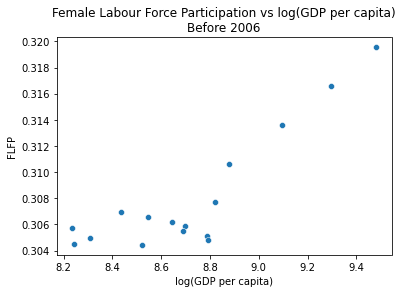

In [30]:
draw_scatter_plot(df_before_2006)

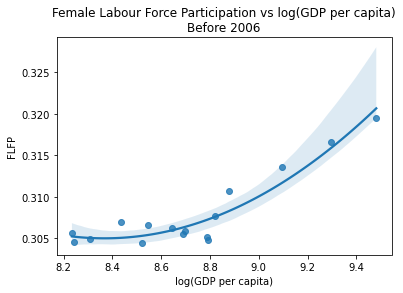

In [31]:
draw_reg_plot(df_before_2006)

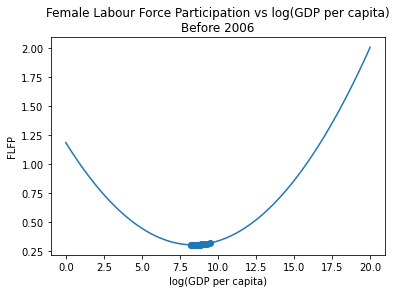

In [32]:
model_before_2006 = draw_extended_reg_plot(df_before_2006)

In [33]:
print(model_before_2006)

         2
0.01261 x - 0.211 x + 1.188


In [34]:
print(get_r2_score(df_before_2006, model_before_2006))

0.9093691704816828


In [35]:
print(get_coorelation(df_before_2006))

0.8674146211561067


> **Regression result before 2006**

| Variable      | Coefficient |
| ----------- | ----------- |
| (log GDP per capita)^2      | ß0 = 0.1261       |
| log GDP per capita   | ß1 = -0.211        |
| R-squared      | 0.9093691704816828       |
| α   | 1.188        |

*R square value is above 0.7 so it implies quadratic fit is a fit for the data.*


> **Coorelation result before 2006**

Coorelation between FLFP and log GDP per capita: **0.8674146211561067**

*This shows strong coorelation*

# **AFTER 2006**

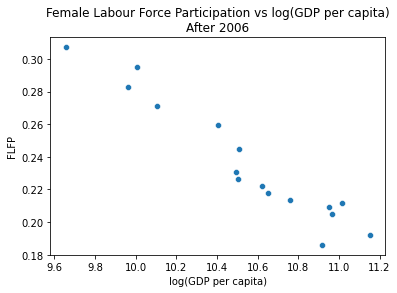

In [36]:
draw_scatter_plot(df_after_2006)

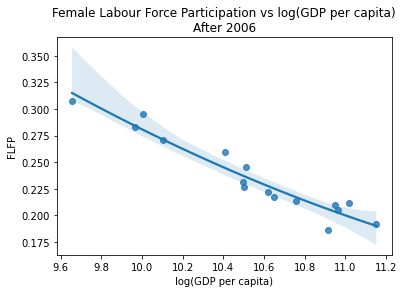

In [37]:
draw_reg_plot(df_after_2006)

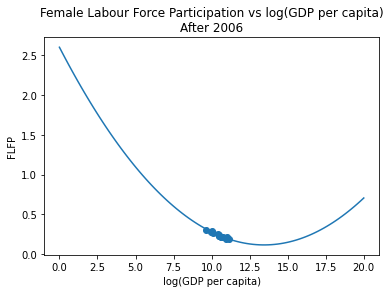

In [38]:
model_after_2006 = draw_extended_reg_plot(df_after_2006)

In [39]:
print(model_after_2006)

        2
0.0137 x - 0.3686 x + 2.596


In [40]:
print(get_r2_score(df_after_2006, model_after_2006))

0.9298091200395427


In [41]:
print(get_coorelation(df_after_2006))

0.9617973838637672


> **Regression result after 2006**

| Variable      | Coefficient |
| ----------- | ----------- |
| (log GDP per capita)^2      | ß0 = 0.0137       |
| log GDP per capita   | ß1 = -0.3686        |
| R-squared      | 0.9298091200395427       |
| α   | 2.596        |

*R square value is above 0.7 so it implies quadratic fit is a fit for the data.*


> **Coorelation result after 2006**

Coorelation between FLFP and log GDP per capita: **0.9617973838637672**

*This shows strong coorelation*

# **CUMMULATIVE**

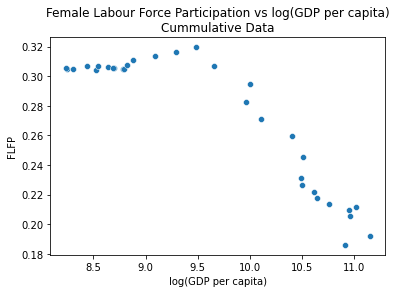

In [42]:
draw_scatter_plot(df)

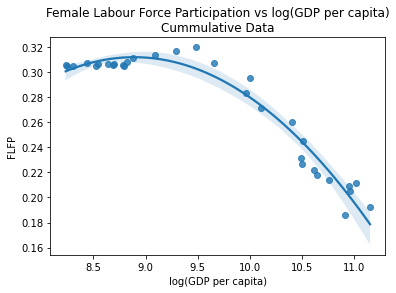

In [43]:
draw_reg_plot(df)

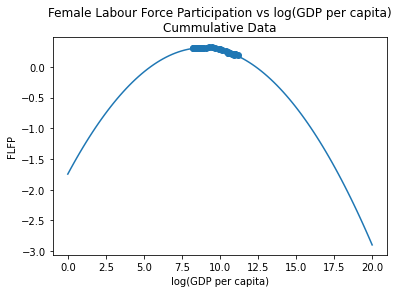

In [44]:
cummulative_model = draw_extended_reg_plot(df)

In [ ]:
ax = before_washing.plot(x='date', y='proportion_deaths', label='Before handwashing')
after_washing.plot(x='date', y='proportion_deaths', label='After handwashing', ax=ax)
ax.set_ylabel('Proportion deaths')

In [45]:
print(cummulative_model)

          2
-0.02601 x + 0.4626 x - 1.745


In [46]:
print(get_r2_score(df, cummulative_model))

0.9538936281313893


In [47]:
print(get_coorelation(df))

0.9020312937686403


> **Regression result (cummulative)**

| Variable      | Coefficient |
| ----------- | ----------- |
| (log GDP per capita)^2      | ß0 = -0.02601       |
| log GDP per capita   | ß1 = 0.4626        |
| R-squared      | 0.9538936281313893       |
| α   | -1.745        |

*R square value is above 0.7 so it implies quadratic fit is a fit for the data.*


> **Coorelation (cummulative)**

Coorelation between FLFP and log GDP per capita: **0.9020312937686403**

*This shows strong coorelation*

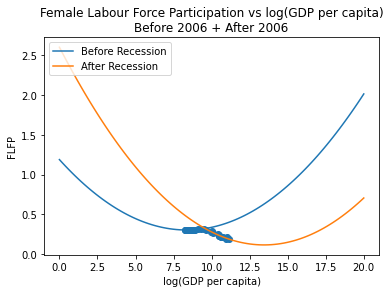

(poly1d([ 0.01260651, -0.21097717,  1.18772135]),
 poly1d([ 0.01370393, -0.36856586,  2.59612449]))

In [51]:
draw_extended_reg_plot_cummulative(df_before_2006, df_after_2006)